# Прогноз цены пальмового масла_линейная регрессия_18.03.2024

## Содержание

* [Описание механизма работы моделей](#Механизм)
* [Импорт библиотек Python и загрузка набора данных](#Импорт)
* [Предобработка данных](#Предобработка)
* [Прогнозирование цены пальмового масла](#Прогнозирование)
    * [Подготовка данных](#Прогнозирование_подготовка)
    * [Обучение моделей линейной регрессии](#Обучение)
        * [Обучение методами библиотеки sklearn](#Обучение_sklearn)
        * [Обучение методами библиотеки sklearn и ручная настройка вектора весов](#Обучение_вектор)
        * [Обучение путем ручной настройки градиентного спуска поиска весов модели](#Обучение_спуск)
    * [Оптимизация работы моделей](#Оптимизация)
        * [Оптимизация модели, построенной методами библиотеки sklearn](#Оптимизация_sklearn)
        * [Оптимизация модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Оптимизация_вектор)
        * [Оптимизация модели, построенной на методе градиентного спуска](#Оптимизация_спуск)
    * [Построение прогноза с применением моделей](#Прогноз)
        * [Подготовка данных для прогнозирования](#Прогноз_данные)
        * [Прогноз модели, построенной методами библиотеки sklearn](#Прогноз_sklearn)
        * [Прогноз модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Прогноз_вектор)
        * [Прогноз модели, построенной на методе градиентного спуска](#Прогноз_спуск)
    * [Выгрузка данных](#Выгрузка)

## Описание механизма работы моделей <a class = "anchor" id = "Механизм"></a>

Текущий файл - это рабочая версия моделей линейной регрессии, используемых для прогнозирования цены пальмового масла.

Данный механизм характеризуется следующими параметрами:

1. Исходный набор данных, загружаемый в тетрадь Jupyter Notebook, включает в себя следующие параметры (в скобках указано название параметра в таблице данных):
    * Календарная дата (date)
    * **Соевое масло**_цена в Роттердаме, долл/т (Soybean oil_Rotterdam);
    * **Соевое масло**_цена в Бразилии, долл/т (Soybean oil_Brazil);
    * **Соевое масло**_цена в Аргентине, долл/т (Soybean oil_Argentina);
    * **Соевые бобы**_цена в Бразилии, долл/т (Soybean seed_Brazil);
    * **Рапсовое масло**_цена в Роттердаме, долл/т (Rapeseed oil_Rotterdam);
    * Курс рупий к доллару (Rupees/долл);
    * Курс юаня к доллару (Yuan/долл);
    * Курс евро к доллару (Euro/долл);
    * Курс рубля к доллару (Ruble/долл);
    * Курс ринггита к доллару (Ringgit/долл);
    * Цена нефти марки Brent, долл/т (Oil_Brent);
    * Цена нефти марки Urals. долл/т (Oil_Urals);
    * **Пальмовое масло**_цена сырого, долл/т (Palm oil_crude);
    * **Пальмовое масло**_цена очищенного, долл/т (Palm oil_RBD);
    * **Пальмовое масло**_цена в Аргентине, долл/т (Palm oil_Argentina);
    * Биодизельное топливо_цена в США, долл/т (Biodiesel_USA);
    * Среднесуточная температура в Куала-Лумпур, Малайзия, градусы C (mean_temp);
    * Среднесуточное давление в Куала-Лумпур, Малайзия, Па (mean_pres);
    * Среднесуточная влажность воздуха в Куала-Лумпур, Малайзия, % (mean_humid).


2. **Набор данных, используемый в машинном обучении и дальнейшем прогнозировании цены пальмового масла, включает в себя следующие параметры** (в скобках указано название параметра в таблице данных):
    * Среднесуточная температура в Куала-Лумпур, Малайзия (mean_temp);
    * Среднесуточное давление в Куала-Лумпур, Малайзия (mean_pres);
    * Среднесуточная влажность воздуха в Куала-Лумпур, Малайзия (mean_humid);
    * Курс евро к доллару (euro);
    * Курс рубля к доллару (ruble);
    * Курс юаня к доллару (yuan);
    * Курс рупий к доллару (rupees);
    * Курс ринггита к доллару (ringgit);
    * Цена нефти марки Brent (oil_brent);
    * Цена нефти марки Urals (oil_urals).
    
    
3. Прогнозируемая целевая переменная - **Пальмовое масло_цена очищенного, долл/т (palm_oil)**;
4. Метод прогнозирования - **линейная регрессия**;
5. Метод прогнозирования новых значений признаков модели - **модели авторегрессионного скользящего среднего**;
5. Источники данных:
    * Ценовые показатели и курсы валют - **Информационный терминал Thomson Reuters Eikon**;
    * Погодные показатели - **Информационный ресурс: rp5 - https://rp5.ru/%D0%9F%D0%BE%D0%B3%D0%BE%D0%B4%D0%B0_%D0%B2_%D0%9A%D1%83%D0%B0%D0%BB%D0%B0-%D0%9B%D1%83%D0%BC%D0%BF%D1%83%D1%80%D0%B5**

## Импорт библиотек Python и загрузка набора данных <a class = "anchor" id = "Импорт"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Импорт библиотек для работы с данными табличного вида, машинного обучения и визуализации данных;
2. Инициализация переменной для хранения импортируемого набора - **raw_data**;
3. Инициализация переменной и отбор в нее данных для дальнейшего машинного обучения и прогноза значений - **df**

    где **raw_data** подразумевает хранение "сырых" - первоначальных - данных;
    **df** - сокращенно от "DataFrame" - хранит специально отобранные признаки.

In [7]:
# импорт библиотек для работы с табличными данными и объектами линейной алгебры
import pandas as pd
import numpy as np

# импорт методов работы с датой и временем
from datetime import datetime, timedelta, date

# импорт библиотек для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# импорт методов машинного обучения
# импорт объекта линейной регрессии
from sklearn.linear_model import LinearRegression

# импорт метрик оценки качества модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# импорт методов обработки данных и масштабирования значений
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# импорт методов построения моделей авторегрессии
import warnings
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# импорт библиотеки для сохранения данных в формате pickle
import pickle

C:\Users\k.storozhuk\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# загрузка набора данных в рабочую среду
raw_data = pd.read_excel("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/datasets/dataset_po modeling.xlsx")
# отобразим состав исходного набора в виде списка названий столбцов и количество строк
print('Перечень названий столбцов исходного набора данных:')
for i in raw_data.columns.to_list():
    print('*', i)
print()
print('Количество строк в исходном наборе данных:', raw_data.shape[0])

Перечень названий столбцов исходного набора данных:
* date
* Soybean oil_Rotterdam
* Soybean oil_Brazil
* Soybean oil_Argentina
* Soybean seed_Brazil
* Rapeseed oil_Rotterdam
* Rupees/$
* Yuan/$
* Euro/$
* Ruble/$
* Ringgit/$
* Oil_Brent
* Oil_Urals
* Palm oil_crude
* Palm oil_RBD
* Palm oil_Argentina
* Biodiesel_USA
* mean_temp
* mean_pres
* mean_humid

Количество строк в исходном наборе данных: 4984


In [9]:
# отберем из исходного набора только необходимые для моделирования столбцы
data = raw_data[['date', 'Rupees/$', 'Yuan/$', 'Euro/$', 'Ruble/$', 'Ringgit/$', 'Oil_Brent',
                 'Oil_Urals', 'Palm oil_RBD', 'mean_temp', 'mean_pres', 'mean_humid']]
# изучим типы данных в столбцах нового набора
data.dtypes

date            datetime64[ns]
Rupees/$               float64
Yuan/$                 float64
Euro/$                 float64
Ruble/$                float64
Ringgit/$              float64
Oil_Brent              float64
Oil_Urals              float64
Palm oil_RBD           float64
mean_temp              float64
mean_pres              float64
mean_humid             float64
dtype: object

## Предобработка данных <a class = "anchor" id = "Предобработка"></a>

Данный блок характеризуется следующими последовательными действиями с переменной **data**:
1. Трансформация заголовков датафрейма - перевод их к одному типу и стилю написания;
2. Фильтрация пустых значений в наборе данных;

По итогам этапа значения в переменной **data** полностью готовы к дальнейшему использованию в машинном обучении.

In [12]:
# приведем названия столбцов к формату 'snake_case'
data.columns = data.columns.str.lower()

# сосчитаем количество пустых значений
data.isna().sum()

date               0
rupees/$           0
yuan/$             0
euro/$             0
ruble/$            0
ringgit/$          0
oil_brent          0
oil_urals          0
palm oil_rbd       1
mean_temp       1106
mean_pres       1106
mean_humid      1106
dtype: int64

In [13]:
# найдем дату последнего пустого значения по столбцу mean_temp
last_isna_date = data[data['mean_temp'].isnull() == True]['date'].to_list()[-1]

# формируем непрерывный набор данных и отсекаем пустые значения
data = data[data['date'] > last_isna_date]

# проверяем датафрейм на пустоты
data.isna().sum()

date            0
rupees/$        0
yuan/$          0
euro/$          0
ruble/$         0
ringgit/$       0
oil_brent       0
oil_urals       0
palm oil_rbd    0
mean_temp       0
mean_pres       0
mean_humid      0
dtype: int64

## Прогнозирование цены пальмового масла <a class = "anchor" id = "Прогнозирование"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Подготовка данных](#Прогнозирование_подготовка)
2. [Обучение моделей линейной регрессии](#Обучение)
3. [Оптимизация работы моделей](#Оптимизация)
4. [Построение прогноза с помощью моделей](#Прогноз)

Каждый этап так же содержит в себе промежуточные подшаги. Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

### Подготовка данных <a class = "anchor" id = "Прогнозирование_подготовка"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Обработка данных в переменной **data** - формирование столбца индекса из дат;
2. Разбиение общего набора данных на обучающую и тестовую выборки в соотношении "80/20";
3. Инициализация переменных **X_train, y_train** и **X_test, y_test** для хранения области признаков (переменные с литерой "X") и вектора значений целевой переменной (переменные с литерой "y");
4. Масштабирование значений переменных **X_train** и **X_test** - формирование переменных **X_train_std** и **X_test_std**.

In [18]:
# сформируем новый фрейм данных исходя из отобранных столбцов и преобразуем столбец 'date' в индекс набора данных
data = data.set_index('date')

Следующим шагом выступает формирование обучающего и тестового наборов данных.

После проведенных исследований оптимальным соотношением Обучающей и Тестовой выборок было выбрано соотношение "80/20", где из общего набора данных **80% составляют значения Обучающей выборки** и **20% - значения Тестовой выборки**.

In [20]:
# запишем значения даты в отдельную переменную - объект Series
date_series = pd.Series(data.index)

# разобьем датафрейм на обучающий и тестовый наборы
filter_date = date_series.quantile(0.8)

train_data = data[data.index < filter_date]
test_data = data[data.index >= filter_date]

In [21]:
# формируем список признаков модели. Для этого создадим список из наименований столбцов датафрейма в переменной data
columns_list = data.columns.to_list()
columns_list.remove('palm oil_rbd')

# формируем области признаков и вектора значений целевой переменной
X_train = train_data[columns_list]
X_test = test_data[columns_list]
y_train = train_data['palm oil_rbd']
y_test = test_data['palm oil_rbd']

In [22]:
# инициализируем объект масштабирования в отдельную переменную
mm = MinMaxScaler()

# масштабируем значения областей признаков
X_train_std = mm.fit_transform(X_train)
X_test_std = mm.transform(X_test)

### Обучение моделей линейной регрессии <a class = "anchor" id = "Обучение"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Обучение методами библиотеки sklearn](#Обучение_sklearn)
2. [Обучение методами библиотеки sklearn и ручная настройка вектора весов](#Обучение_вектор)
3. [Обучение путем ручной настройки градиентного спуска поиска весов модели](#Обучение_спуск)

Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

#### Обучение методами библиотеки sklearn <a class = "anchor" id = "Обучение_sklearn"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **reg** для хранения объекта линейной регрессии;
2. Обучение линейной регрессии на значениях переменных **X_train_std** и **y_train**;
3. Получение коэффициентов (весов) для признаков модели и вывод на экран их значений с выделением цветовой подсветкой;

In [27]:
# инициализируем объект линейной регрессии
reg = LinearRegression()

# обучаем линейную регрессию
reg.fit(X_train_std, y_train)

LinearRegression()

In [28]:
# выведем на экран с помощью пользовательской функции коэффициенты, которые модель подобрала для признаков
def cell_color(data):
    if data < -2:
        return 'background-color: skyblue'
    elif data > 2:
        return 'background-color: darksalmon'
    else:
        return 'background-color: white'

In [29]:
# визуализируем веса
df_coef = pd.DataFrame(data = np.array([reg.coef_]), columns = X_train.columns)
df_coef.style.applymap(lambda x: cell_color(x))

,rupees/$,yuan/$,euro/$,ruble/$,ringgit/$,oil_brent,oil_urals,mean_temp,mean_pres,mean_humid
0,326.194271,-526.130759,66.735404,765.643152,494.570393,1204.196517,-575.943843,-168.485765,-139.424383,-195.321776


#### Обучение методами библиотеки sklearn и ручная настройка вектора весов <a class = "anchor" id = "Обучение_вектор"></a>

Данный блок характеризуется следующими последовательными действиями:

1. Инициализация переменной **w** (от слова "weights") для хранения вектора весов модели из предыдущего блока.

In [32]:
# инициализация переменной для хранения значений вектора весов
w = np.array([reg.coef_])

# регулировка первого веса вектора
np.put(w, 0, 850)

#### Обучение путем ручной настройки градиентного спуска поиска весов модели <a class = "anchor" id = "Обучение_спуск"></a>

Данный блок характеризуется следующими последовательными действиями:

1. Формирование пользовательских функций **mserror** (для вычисления функции ошибки MSE) и **grad_mserror** (производная функции ошибки MSE для дальнейшего использования в механизме градиентного спуска);
2. Формирование алгоритма градиентного спуска:
    * инициализация стартовой точки - вектор первоначальных коэффициентов со значениями "0";
    * ввод параметров, используемых в градиентном спуске:
        * критерий остановки **eps**;
        * шаг обучения **learning_rate**;
        * количество итераций цикла градиентного спуска **n**;
    * реализация алгоритма градиентного спуска.

In [35]:
# реализация алгоритма градиентного спуска

# функция ошибки MSE
def mserror(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred)**2 ) / len(y_pred)

# функция градиентного спуска
def grad_mseerror(X, w, y):
    y_pred = X @ w
    return 2/len(X) * (y - y_pred) @ (-X)

In [36]:
# # инициализация вектора весов
weights = np.zeros(X_train.shape[1])
# 
# ввод критерия остановки
eps = 10**-3
# ввод шага обучения
learning_rate = 0.32
# количество итераций
n = 10**5

# ввод переменной, которая будет участвовать в цикле перебора весов модели
next_weights = weights

# цикл градиентного спуска
for i in range(n):
    cur_weights = next_weights
    next_weights = cur_weights - learning_rate * grad_mseerror(X_train_std, cur_weights, y_train)
    if np.linalg.norm(cur_weights - next_weights, ord = 2) <= eps:
        break

### Оптимизация работы моделей <a class = "anchor" id = "Оптимизация"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Оптимизация модели, построенной методами библиотеки sklearn](#Оптимизация_sklearn)
2. [Оптимизация модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Оптимизация_вектор)
3. [Оптимизация модели, построенной на методе градиентного спуска](#Оптимизация_спуск)

Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

#### Оптимизация модели, построенной методами библиотеки sklearn <a class = "anchor" id = "Оптимизация_sklearn"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Дополнительное обучение объекта линейной регрессии (переменная **reg**) на тестовых данных (переменные **X_test_std** и **y_test**);
2. Инициализация переменной **df_coef_opt** для хранения обновленных значений весов для признаков модели;
3. Инициализация переменной **y_pred** для хранения прогноза модели на тестовых данных. Формирование столбца индекса на основании индексов переменной **y_test**;
4. Построение графиков значений прогноза модели и фактических значений тестовых данных;

In [41]:
# указываем название файла хранения модели линейной регрессии
# filename = 'linear_sklearn_model_array_v1.sav'

# загружаем модель в рабочую среду Jupyter Notebook
# reg = pickle.load(open(filename, 'rb'))

In [42]:
# дообучаем линейную регрессию на тестовых данных
reg.fit(X_test_std, y_test)

LinearRegression()

In [43]:
# визуализируем обновленные веса
df_coef_opt = pd.DataFrame(data = np.array([reg.coef_]), columns = X_train.columns)
df_coef_opt.style.applymap(lambda x: cell_color(x))

,rupees/$,yuan/$,euro/$,ruble/$,ringgit/$,oil_brent,oil_urals,mean_temp,mean_pres,mean_humid
0,77.622436,-289.765746,139.621948,-260.454792,-71.379211,-93.918299,541.311195,16.371520,12.119939,-0.511472


In [44]:
# получаем предсказания (ответы) алгоритма
y_t_pr_sk = pd.DataFrame(reg.predict(X_test_std))

# формируем индексы для новых наборов данных
y_t_pr_sk.index = y_test.index.date

# меняем названия столбцов
y_t_pr_sk = y_t_pr_sk.rename(columns = {0: "sklearn_values"})

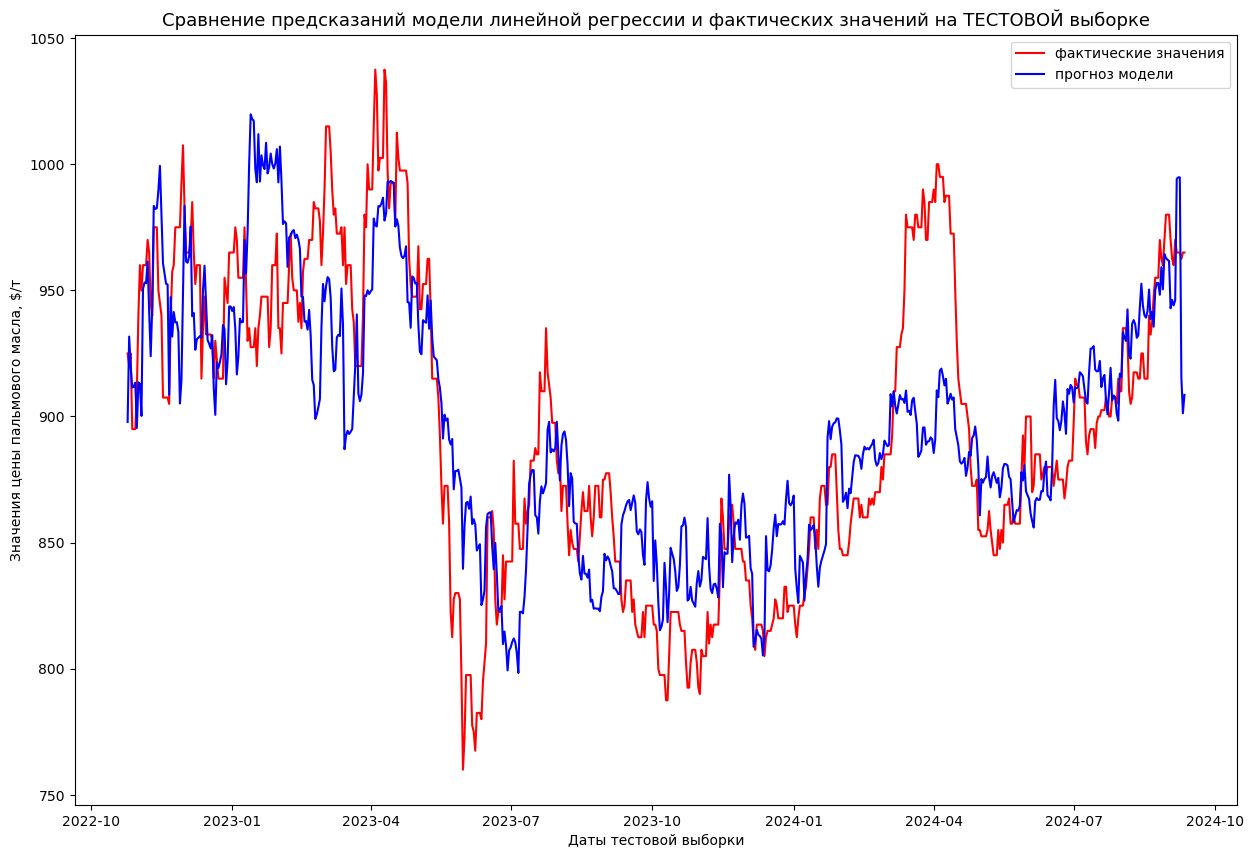

In [45]:
# визуализируем предсказания для тестовой выборки на графике
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'фактические значения')
plt.plot(y_t_pr_sk, color = 'blue', label = 'прогноз модели')
plt.title('Сравнение предсказаний модели линейной регрессии и фактических значений на ТЕСТОВОЙ выборке', fontsize = 13)
plt.xlabel('Даты тестовой выборки')
plt.ylabel('Значения цены пальмового масла, $/т')
plt.legend()
plt.show()

#### Оптимизация модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов <a class = "anchor" id = "Оптимизация_вектор"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **y_pred_linear** для хранения прогноза модели на тестовых данных. Формирование столбца индекса на основании индексов переменной **y_test**;
2. Построение графиков значений прогноза модели и фактических значений тестовых данных;

In [48]:
# импорт массива с ручной настройкой весов

# w = np.loadtxt('array_weights_array_v1.txt', dtype = float)

In [49]:
# получим предсказания с применением методов линейной алгебры
y_t_pr_arr = pd.DataFrame(np.dot(X_test_std, w.T))

# формируем индексы для новых наборов данных
y_t_pr_arr.index = y_test.index.date

# меняем названия столбцов
y_t_pr_arr = y_t_pr_arr.rename(columns = {0: "array_values"})

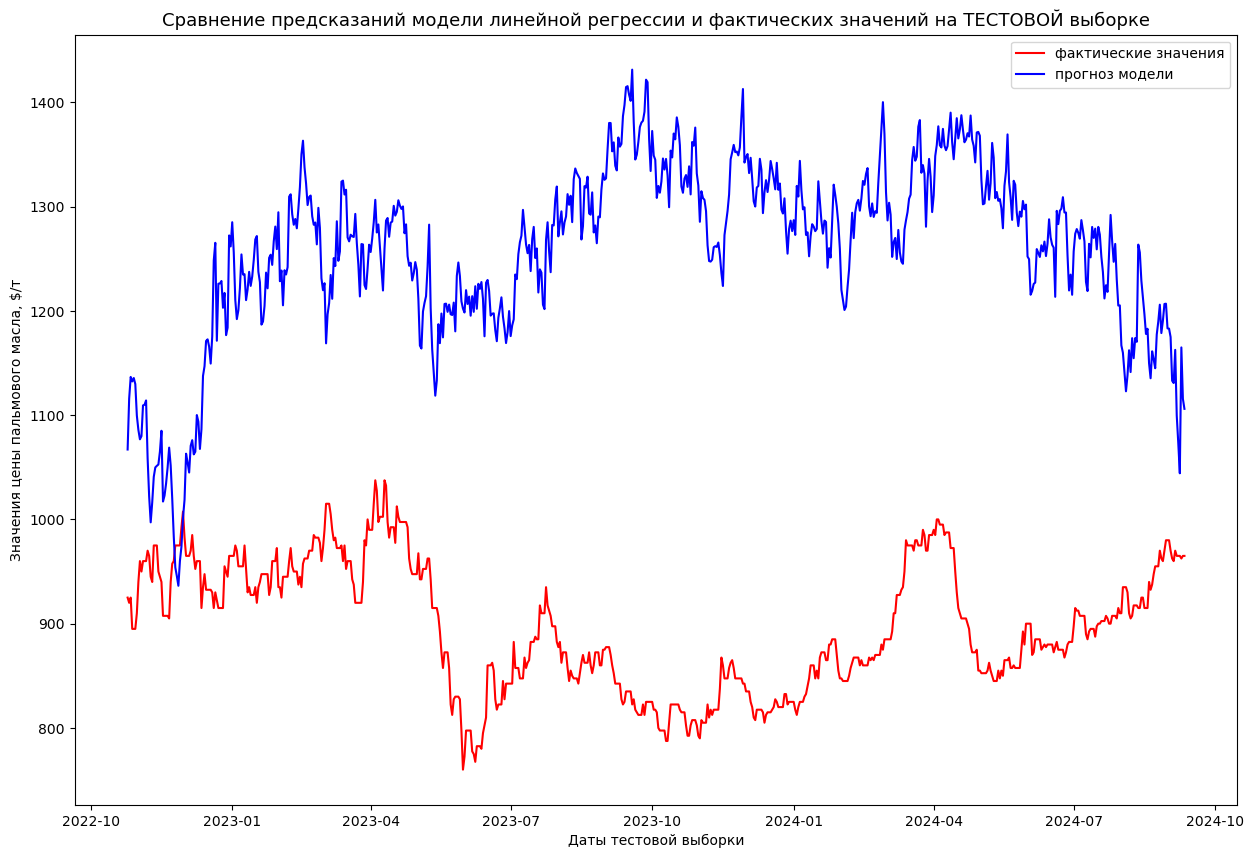

In [50]:
# визуализируем предсказания для тестовой выборки на графике
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'фактические значения')
plt.plot(y_t_pr_arr, color = 'blue', label = 'прогноз модели')
plt.title('Сравнение предсказаний модели линейной регрессии и фактических значений на ТЕСТОВОЙ выборке', fontsize = 13)
plt.xlabel('Даты тестовой выборки')
plt.ylabel('Значения цены пальмового масла, $/т')
plt.legend()
plt.show()

#### Оптимизация модели, построенной на методе градиентного спуска <a class = "anchor" id = "Оптимизация_спуск"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **weights_opt**, которой присваиваются предыдущие значения весов для признаков модели;
2. Реализация градиентного спуска, где в качестве стартовой точки выбраны значения весов, хранящиеся в переменной **weights_opt**;
3. Расчет прогнозных значений путем скалярного произведения вектора весов **next_weights** и матрицы признаков **X_test_std**;
4. Визуализация графиков прогнозных значений модели и фактических значений тестовых данных;

In [53]:
# импорт весов модели градиентного спуска

# next_weights = np.loadtxt('gradient_descent_array_v1.txt', dtype = float)

In [54]:
# записываем текущие веса в новую переменную
weights_opt = next_weights

In [55]:
# ввод критерия остановки для нового спуска
eps_opt = 10**-3
# ввод шага обучения
learning_rate_opt = 0.1
# количество итераций
n_opt = 10**5

# цикл градиентного спуска
for i in range(n_opt):
    cur_weights = weights_opt
    next_weights = cur_weights - learning_rate_opt * grad_mseerror(X_test_std, cur_weights, y_test)
    if np.linalg.norm(cur_weights - next_weights, ord = 2) <= eps_opt:
        break

In [56]:
# рассчитываем прогноз для валидационных данных
y_t_pr_dc = pd.DataFrame(X_test_std @ next_weights)

# формируем индексы
y_t_pr_dc.index = y_test.index.date

# меняем названия столбцов
y_t_pr_dc = y_t_pr_dc.rename(columns = {0 : 'descent_values'})

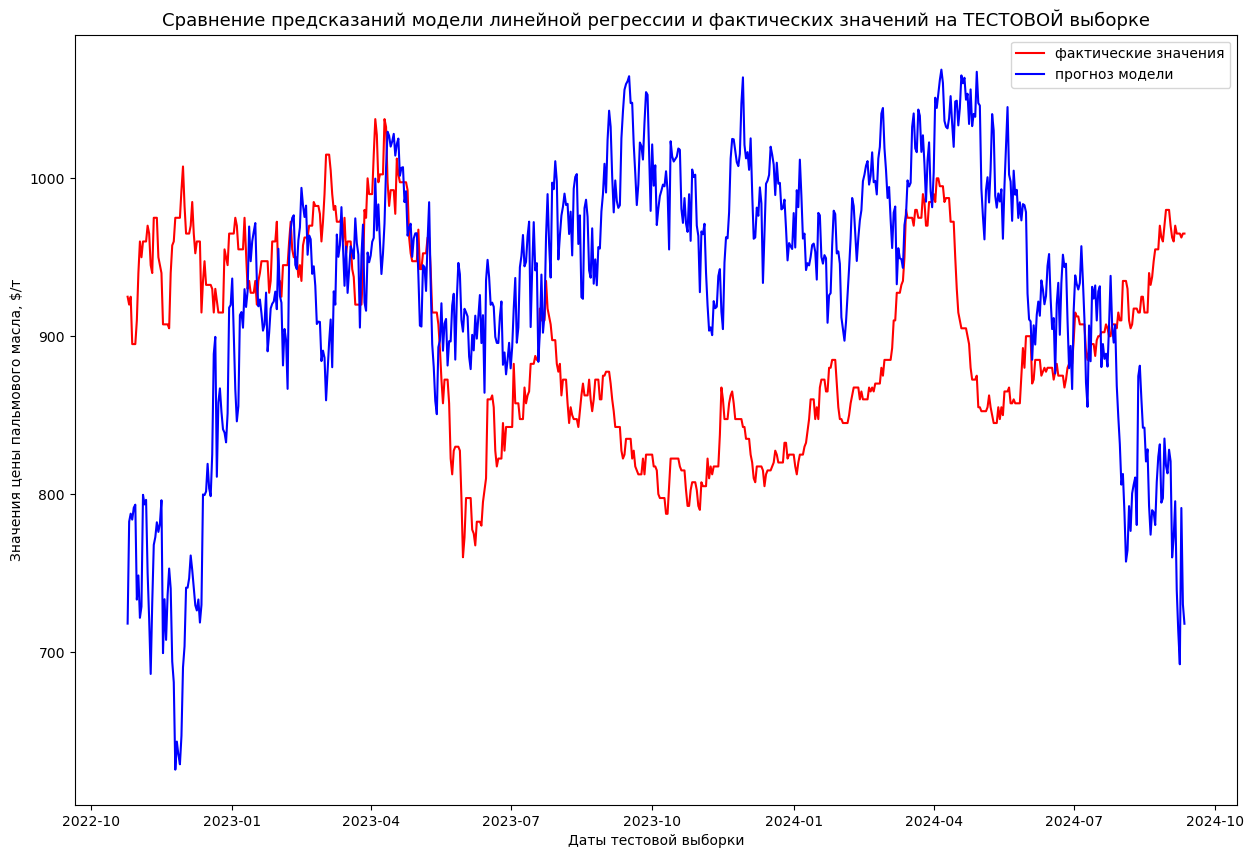

In [57]:
# визуализируем предсказания для тестовой выборки на графике
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'фактические значения')
plt.plot(y_t_pr_dc, color = 'blue', label = 'прогноз модели')
plt.title('Сравнение предсказаний модели линейной регрессии и фактических значений на ТЕСТОВОЙ выборке', fontsize = 13)
plt.xlabel('Даты тестовой выборки')
plt.ylabel('Значения цены пальмового масла, $/т')
plt.legend()
plt.show()

### Построение прогноза с помощью моделей <a class = "anchor" id = "Прогноз"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Подготовка данных для прогнозирования](#Прогноз_данные)
2. [Прогноз модели, построенной методами библиотеки sklearn](#Прогноз_sklearn)
3. [Прогноз модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Прогноз_вектор)
4. [Прогноз модели, построенной на методе градиентного спуска](#Прогноз_спуск)

Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

#### Подготовка данных для прогнозирования <a class = "anchor" id = "Прогноз_данные"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Преобразование переменных **X_train_std** и **X_test_std** из формата "numpy-array" к "формату dataframe";
2. Объявление пользовательской функции **forecast_1m** для прогноза значений признаков на ближайший месяц;
3. Получение прогноза значений признаков на обозначенный период в виде таблицы данных и сохранение его в переменную **pred_features**;

In [62]:
# инициализация переменной для хранения масштабированных данных в формате dataframe
X_train_df = pd.DataFrame(data = X_train_std, columns = columns_list, index = X_train.index)
X_test_df = pd.DataFrame(data = X_test_std, columns = columns_list, index = X_test.index)

In [63]:
# объявляем пользовательскую функцию "forecast_1m"

def forecast_1m (full_data, train_data, test_data):
    # вводим переменную для хранения подобранных параметров
    param_search = pm.auto_arima(train_data, seasonal = True, trace = True, suppress_warnings = True, stepwise = True)
    # объявляем объект модели авторегрессии и передаем ей найденные оптимальные параметры для дальнейшего обучения
    SARIMAXmodel = SARIMAX(train_data, order = param_search.get_params().get("order"),
                           seasonal_order = param_search.get_params().get("seasonal_order")).fit()
    
    # вводим переменные для хранения стартовой и конечной точек прогноза
    start = len(full_data.index)
    end = start + 29
    
    # строим прогноз на 10 дней вперед
    forecast = round(SARIMAXmodel.predict(start, end), 2)
    
    # формируем индекс для прогнозов
    forecast.index = pd.date_range(start = pd.to_datetime(max(data.index.date) + timedelta(days = 1), format = '%Y-%m-%d'),
                               freq = 'D', periods = 30)
    return forecast

In [64]:
# инициализация переменной для пустого датафрейма
empty_df = pd.DataFrame(index = pd.date_range(start = pd.to_datetime(max(data.index.date) + timedelta(days = 1)
                                                                     , format = '%Y-%m-%d'), freq = 'D', periods = 30))

# принудительно отключим предупреждения системы
warnings.simplefilter(action = 'ignore', category = Warning)

# ввод цикла для построения прогнозов значений признаков и их сбора в один датафрейм
for i in columns_list:
    feature_i = forecast_1m(data, X_train_df[i], X_test_df[i])
    empty_df['pred_' + i] = feature_i
    
# заменим название на более подходящее
pred_features = empty_df

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17582.488, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17580.396, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17579.151, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17579.229, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17578.758, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17582.295, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17572.429, Time=1.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-17580.389, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-17580.125, Time=3.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17574.944, Time=2.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-17579.949, Time=2.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-17582.276, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-17579.256, Time=1.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-17580.070, Time=0.29 sec

Best

#### Прогноз модели, построенной методами библиотеки sklearn <a class = "anchor" id = "Прогноз_sklearn"></a>

In [66]:
# воспользуемся методом predict объекта линейной регрессии для прогнозирования значений
pr_sk = reg.predict(pred_features)

# сформируем прогноз в виде датафрейма
pr_sk = pd.DataFrame({"sklearn_values" : pr_sk,
                               'date' : pred_features.index.date})

# формируем столбец индекса
pr_sk = pr_sk.set_index('date') 

#### Прогноз модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов <a class = "anchor" id = "Прогноз_вектор"></a>

In [68]:
# сохраняем прогноз в новую переменную, которую трансформируем в датафрейм
pr_arr = pd.DataFrame(data = pred_features.to_numpy() @ w.T,
                             index = pred_features.index.date)

# меняем названия столбцов
pr_arr = pr_arr.rename(columns = {0 : 'array_values'})

#### Прогноз модели, построенной на методе градиентного спуска <a class = "anchor" id = "Прогноз_спуск"></a>

In [70]:
# сохраняем прогноз в новую переменную, которую трансформируем в датафрейм
pr_dc = pd.DataFrame({'descent_values': pred_features.to_numpy() @ next_weights,
                               'date' : pred_features.index.date})

# формируем индекс на основании значений индекса спрогнозированных фичей
pr_dc = pr_dc.set_index('date')

## Выгрузка данных <a class = "anchor" id = "Выгрузка"></a>

Данный этап характеризуется следующими последовательными действиями:
1. Расчет значения целевой переменной для данных обучающей выборки с использованием трех веток моделей: инициализация переменных **y_tr_pr_sk**, **y_tr_pr_arr**, **y_tr_pr_dc**;
2. Объявление функции **concat_data** для соединения трех переменных (значения **y** обучающей и тестовой выборок, а также - новые прогнозные точки данных);
3. Применение функции и объединение данных - инициализация переменных **sk_data**, **arr_data**, **dc_data**;
4. Объединение фреймов в один общий набор - создание новой переменной **joined_data** для хранения значений;
5. Инициализация переменной **pred_point** - объединение прогнозов 3 веток на ближайшие 10 дней в один набор данных;
6. Инициализация переменной **linear_arr_v1_history** - подгрузка исторических значений прогнозов моделей на 10 дней и добавление новых значений прогноза;
7. Исполнение алгоритмов сохранения значений параметров каждой из моделей в виде отдельных датафреймов с добавлением в каждый:
    * Даты обновления;
    * Ошибка MAE;
    * Ошибка RMSE;
    * Ошибка MAPE.
8. Выгрузка сформированных датафреймов на ПК для дальнейшего использования в отчетности;
9. Сохраняем общий набор данных (с учетом прогнозов на обучающей и тестовой выборках) на ПК;
10. Сохраняем параметры моделей для использования их без предварительного обучения моделей на обновленных данных.

In [73]:
# расчитываем значения цены пальмового масла для обучающей выборки методами sklearn
y_tr_pr_sk = pd.DataFrame({'sklearn_values' : reg.predict(X_train_std),
                                'date': X_train.index.date})
y_tr_pr_sk = y_tr_pr_sk.set_index('date')

# расчитываем значения цены пальмового масла для обучающей выборки методом ручной настройки весов
y_tr_pr_ln = pd.DataFrame(data = X_train_std @ w.T,
                                index = X_train.index.date)
y_tr_pr_ln = y_tr_pr_ln.rename(columns = {0: 'array_values'})

# расчитываем значения цены пальмового масла для обучающей выборки методом градиентного спуска
y_tr_pr_dc = pd.DataFrame({'descent_values': X_train_std @ next_weights.T,
                               'date': X_train.index.date})
y_tr_pr_dc = y_tr_pr_dc.set_index('date')

In [74]:
# объявление функции соединения фреймов данных
def concat_data(train_frame, test_frame, new_point):
    frames = [train_frame, test_frame, new_point]
    return pd.concat(frames)

In [75]:
# объединяем фреймы данных по вертикали
sk_data = concat_data(y_tr_pr_sk, y_t_pr_sk, pr_sk)
arr_data = concat_data(y_tr_pr_ln, y_t_pr_arr, pr_arr)
dc_data = concat_data(y_tr_pr_dc, y_t_pr_dc, pr_dc)

In [76]:
# объединим предсказания в один датафрейм
jn_sklearn_descent = sk_data.join(dc_data)
full_data = jn_sklearn_descent.join(arr_data)

In [77]:
# объединение прогнозов в один датафрейм
pred_point = pr_sk.join(pr_arr).join(pr_dc).head(10)

# импорт исторических значений
linear_arr_v1_history = pd.read_csv("~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/prediction history/linear_arr_v1_history.csv")

# добавление новой прогнозной точки в историю прогнозов
linear_arr_v1_history = pd.concat([linear_arr_v1_history, pred_point])

# сохранение обновленной истории на ПК
linear_arr_v1_history.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/prediction history/linear_arr_v1_history.csv")

In [78]:
# записываем точку данных с текущими параметрами модели SKLEARN
sklearn_point = pd.DataFrame(data = np.array([reg.coef_]), columns = X_train.columns)

# формируем столбцы для хранения значений даты и функций ошибок
sklearn_point = sklearn_point.assign(
    date = date.today(),
    mae = mean_absolute_error(reg.predict(X_test_std), y_test),
    rmse = np.sqrt(mean_squared_error(reg.predict(X_test_std), y_test)),
    mape = mean_absolute_percentage_error(reg.predict(X_test_std), y_test))

# импорт исторических значений параметров модели
sklearn_params_array_v1 = pd.read_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/sklearn_params_array_v1.csv")

# добавление новой точки с параметрами модели
sklearn_params_array_v1 = pd.concat([sklearn_params_array_v1, sklearn_point])

# сохранение обновленного набора данных на ПК
sklearn_params_array_v1.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/sklearn_params_array_v1.csv")

In [79]:
# записываем точку данных с текущими параметрами модели градиентного спуска
descent_point = pd.DataFrame(data = [next_weights], columns = X_test.columns)

descent_point = descent_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_t_pr_dc, y_test),
    rmse = np.sqrt(mean_squared_error(y_t_pr_dc, y_test)),
    mape = mean_absolute_percentage_error(y_t_pr_dc, y_test))

gradient_descent_params_array_v1 = pd.read_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/gradient_descent_params_array_v1.csv")

gradient_descent_params_array_v1 = pd.concat([gradient_descent_params_array_v1, descent_point])

gradient_descent_params_array_v1.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/gradient_descent_params_array_v1.csv")

In [80]:
# записываем точку данных с текущими параметрами модели градиентного спуска
array_point = pd.DataFrame(data = w, columns = X_test.columns)

array_point = array_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_t_pr_arr, y_test),
    rmse = np.sqrt(mean_squared_error(y_t_pr_arr, y_test)),
    mape = mean_absolute_percentage_error(y_t_pr_arr, y_test))

array_params_array_v1 = pd.read_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/array_params_array_v1.csv")

array_params_array_v1 = pd.concat([array_params_array_v1, array_point])

array_params_array_v1.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/array_params_array_v1.csv")

In [81]:
# сохраняем фрейм на ПК
full_data.to_csv('C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/data reports_from jupyter/linear_auto_v1.csv')

In [82]:
# сохранение моделей и их параметров

# сохраняем модель линейной регрессии, обученной методами sklearn
filename = 'linear_sklearn_model_array_v1.sav'
pickle.dump(reg, open(filename, 'wb'))

# сохраняем веса, полученные на градиентном спуска
np.savetxt('gradient_descent_array_v1.txt', next_weights)
 
# сохраняем корректируемые веса
np.savetxt('array_weights_array_v1.txt', w)